In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import Series, DataFrame

In [37]:
titanic=pd.read_csv("train.csv")

In [38]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [39]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


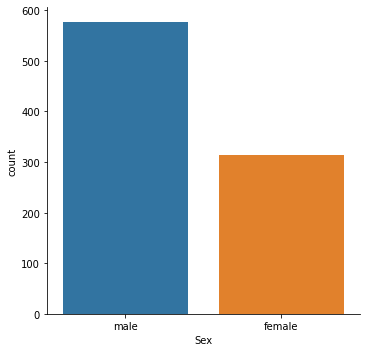

In [40]:
sns.factorplot("Sex",data=titanic, kind="count")

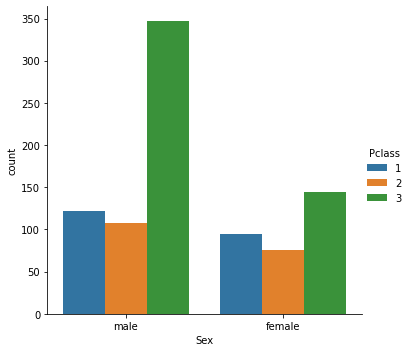

In [41]:
sns.factorplot("Sex",data=titanic,hue="Pclass", kind="count")

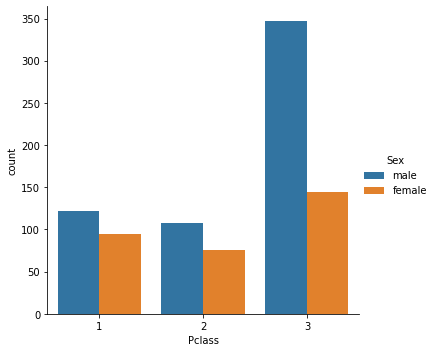

In [42]:
sns.factorplot("Pclass",data=titanic,hue="Sex",kind="count")

In [43]:
def child(passenger):
    age,sex=passenger
    if(age<16):
        return "child"
    else:
        return sex

titanic["person"]=titanic[['Age','Sex']].apply(child,axis=1)

In [44]:
titanic[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


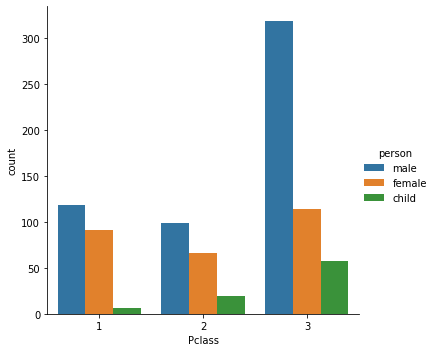

In [45]:
sns.factorplot("Pclass",data=titanic,hue="person",kind="count")

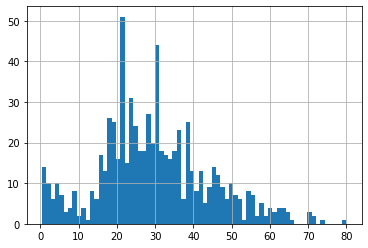

In [46]:
titanic["Age"].hist(bins=70)

In [47]:
titanic["Age"].mean()

29.69911764705882

In [48]:
titanic["person"].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

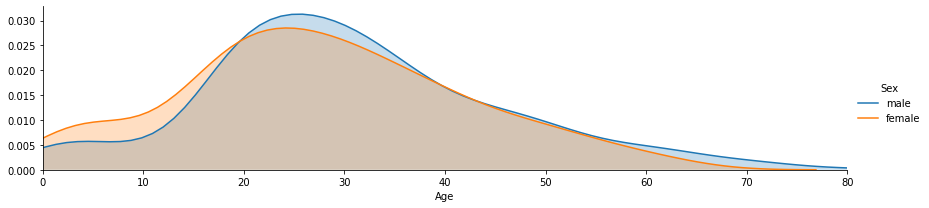

In [49]:
fig=sns.FacetGrid(titanic,hue="Sex",aspect=4)
fig.map(sns.kdeplot,"Age",shade=True)
oldest=titanic["Age"].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

we have nan values in the cabins column so we must deal with it seperately.

In [50]:
deck=titanic["Cabin"].dropna()

In [51]:
levels=[]
for level in deck:
    levels.append(level[0])
cabin=DataFrame(levels)
cabin.columns=["cabin"]

In [52]:
cabin


,cabin
0,C
1,C
2,E
3,G
4,C
5,D
6,A
7,C
8,B
9,D


/home/frosted007/.local/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


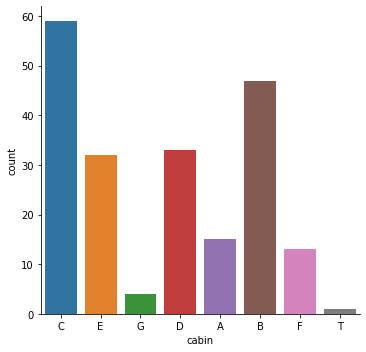

In [53]:
sns.factorplot("cabin",data=cabin, kind="count")

from this we can understand that mostly people were from c cabin

In [54]:
cabin=cabin[cabin.cabin!="T"]

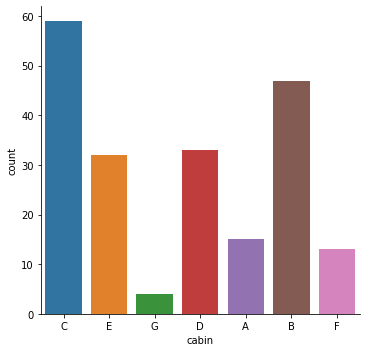

In [55]:
sns.factorplot("cabin",data=cabin, kind="count")

we removed T as its negligible

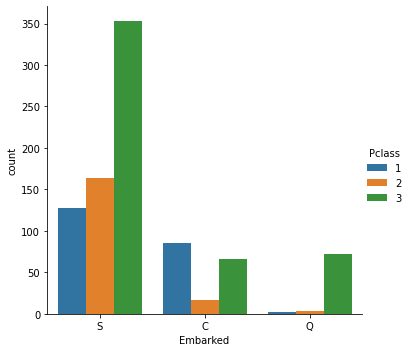

In [56]:
sns.factorplot("Embarked",data=titanic,hue="Pclass",kind="count")

From this graph we can understand that people from "c" embarkment point are more likely to be wealthy and people from this town are more likely to book expensive tickets.so in future the ship companies can have more seats reserved in "c" town in the higher or expensive categories to maximise their profits.

who was alone and who was with family?

In [57]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [82]:
titanic["alone"]=titanic.SibSp+titanic.Parch

In [83]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,0


In [84]:
titanic["alone"].loc[titanic["alone"] > 0] = "with familty"
titanic["alone"].loc[titanic["alone"] == 0] = "alone"

In [85]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,with familty
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,with familty
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,with familty
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,alone


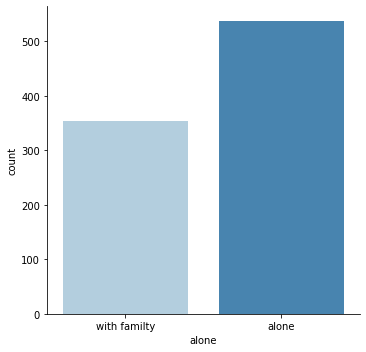

In [89]:
sns.factorplot("alone",data=titanic,kind="count",palette="Blues")

In [92]:
titanic["survivor"]=titanic.Survived.map({0:"no",1:"yes"})

In [93]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,alone,survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,with familty,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,with familty,yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,alone,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,with familty,yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,alone,no


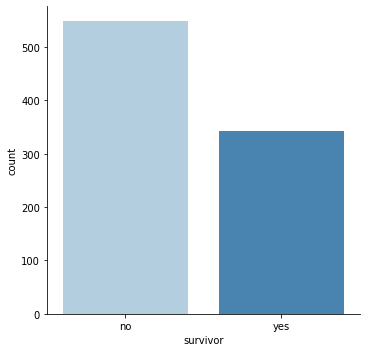

In [94]:
sns.factorplot("survivor",data=titanic,kind="count",palette="Blues")

/home/frosted007/.local/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


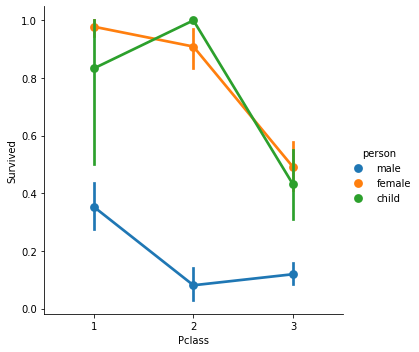

In [96]:
sns.factorplot("Pclass","Survived",data=titanic,hue="person")

from this graph it is understood very clearly that being a male is definitely not  good sign for survival.
as even considering class the survival rate is very low.

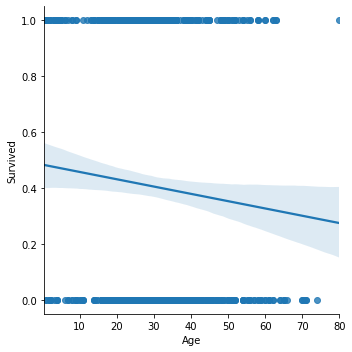

In [97]:
sns.lmplot("Age","Survived",data=titanic)

we can see from here that it is having a slightly negative covariance and corelation between age vs survived that is if age increases survival rate decreases and vice versa.
now lets see the effect of pclass in this graph.

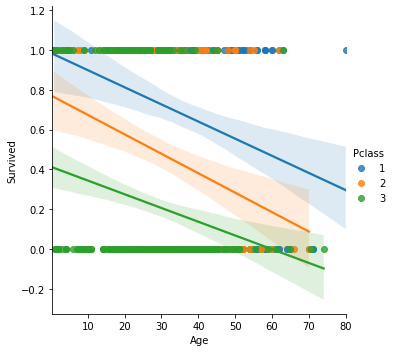

In [99]:
sns.lmplot("Age","Survived",hue="Pclass",data=titanic)

from this graph we can see that class 3 has the lowest survival rate


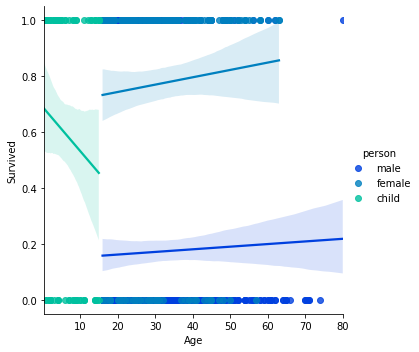

In [101]:
sns.lmplot("Age","Survived",hue="person",palette="winter",data=titanic)

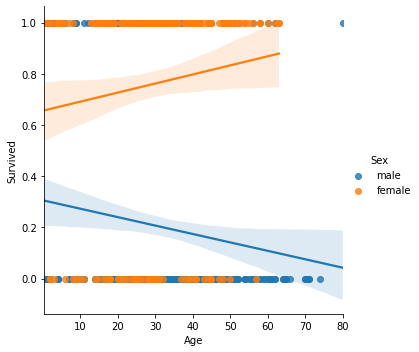

In [103]:
sns.lmplot("Age","Survived",hue="Sex",data=titanic)

as we can see from the above two plots for children age vs surviavl rate is having negative covariance.
like very small children have survived whereas little bigger children like have survived less.

from the above graph we can see that older females have a higher survival rate ad age age goes up and is having positive covariance.

for males its opposite.

1)did the deck have an effect on the passenger survival rate?
2)did having a family member increase the ods of surviving the crash?

In [104]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,alone,survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,with familty,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,with familty,yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,alone,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,with familty,yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,alone,no


In [105]:
cabin

,cabin
0,C
1,C
2,E
3,G
4,C
5,D
6,A
7,C
8,B
9,D


In [106]:
survive=titanic["survivor"]

In [111]:
cabin["survivor"]=survive


/home/frosted007/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [115]:
age=titanic["Age"]

In [116]:
survived=titanic["Survived"]

In [117]:
cabin["survived"]=survived
cabin["age"]=age

/home/frosted007/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/frosted007/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [118]:
cabin

,cabin,survivor,survived,age
0,C,no,0,22.0
1,C,yes,1,38.0
2,E,yes,1,26.0
3,G,yes,1,35.0
4,C,no,0,35.0
5,D,no,0,NaN
6,A,no,0,54.0
7,C,no,0,2.0
8,B,yes,1,27.0
9,D,yes,1,14.0


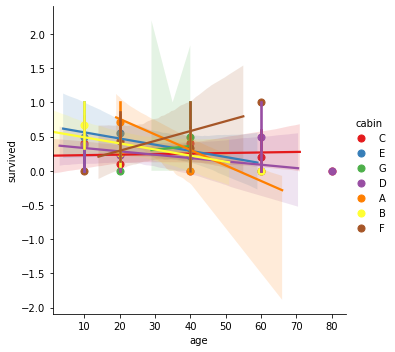

In [126]:
bins=[10,20,40,60,80]
sns.lmplot("age","survived",hue="cabin",data=cabin,x_bins=bins,palette="Set1")

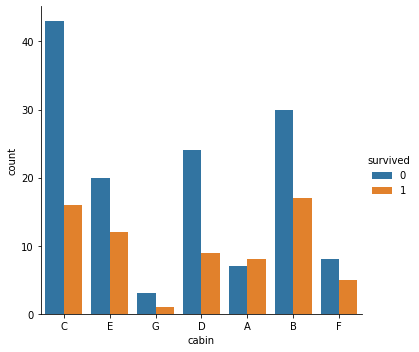

In [122]:
sns.factorplot("cabin",hue="survived",data=cabin,kind="count")


from this graph its clear that deck A has more number of survivors than any other deck as in all decks the number of survivors is less than the number of people who didnt survive.

In [127]:
#2)did having a family member increase the ods of surviving the crash?

In [128]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,alone,survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,with familty,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,with familty,yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,alone,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,with familty,yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,alone,no


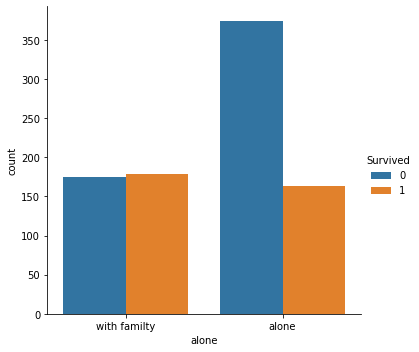

In [130]:
sns.factorplot("alone",hue="Survived",data=titanic,kind="count")

so from this graph its clearly seen that people with faimilies have much higher rate of survival than people those who were alone.